In [65]:
import scipy
import numpy as np
from fitters import *
from tools import *
from plots import *
from projectors import *
set_seaborn()
sns.set_theme()
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
dim = 9
beta = 0
dt = 0.1
time = np.arange(0, 3, dt)
rank = 5
e_s = np.random.uniform(-2, 2, size=(rank))  # np.array([-0.8, -0.15, 1.5])
a_s = np.random.uniform(-1, 1, size=(rank))  # np.array([1.0, 0.2, 0.01])

noise = 1e-4
err_N, err_C = [], []
for noise in range(10):
    e_s = np.random.uniform(-2, 2, size=(rank)) 
    a_s = np.random.uniform(-1, 1, size=(rank)) 
    X_series, Y_series, _, _ = build_exp_series(
        a_s, e_s, noise=noise, time=time)

    
    X_series +=  np.random.uniform(-100,100)
    Y_series +=  np.random.uniform(-100,100)
    Y_series = Y_series[dim:]


    P_series_N, theta, A = eig_companion(X_series, dim, beta=beta)
    P_series_C, theta, A, c = eig_companion_Cshift(X_series, dim, beta=beta)

    P_series_N = solve_scale_shift(P_series_N, Y_series)
    P_series_C = solve_scale_shift(P_series_C, Y_series)

    err_N.append(mean_square_error(Y_series, P_series_N))
    err_C.append(mean_square_error(Y_series, P_series_C))


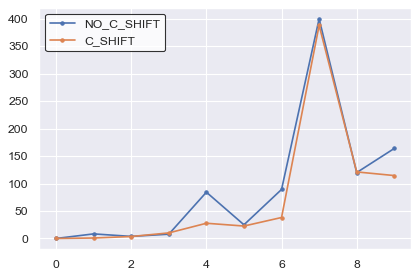

In [99]:
plt.plot(err_N, '.-', label='NO_C_SHIFT')
plt.plot(err_C, '.-', label='C_SHIFT')
plt.legend()
plt.show()
